In [1]:
from sklearn.datasets import fetch_20newsgroups

def fetch_raw_data(categories, remove):
    train = fetch_20newsgroups(data_home='./data/',
                               subset='train',
                               categories=categories,
                               remove=remove)
    test = fetch_20newsgroups(data_home='./data/',
                              subset='test',
                              categories=categories,
                              remove=remove)
    X_train, y_train = train.data, train.target
    X_test, y_test = test.data, test.target

    return X_train, y_train, X_test, y_test

In [14]:
X_train, y_train, X_test, y_test = fetch_raw_data(None, ())

In [15]:
X_train = [[line.strip() for line in doc.split('\n') if line != ''] for doc in X_train ]

In [17]:
num_lines = [len(lst) for lst in X_train]

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
# white, dark, whitegrid, darkgrid, ticks
# sns.set_style('ticks')
sns.set(style="white", context="talk")

In [49]:
df = pd.DataFrame({'Average Lines': num_lines, 'Categories': y_train})

mean_lines = df.groupby('Categories').mean().reset_index()
mean_lines.head()

,Categories,Average Lines
0,0,41.693750
1,1,31.917808
2,2,53.341794
3,3,27.286441
4,4,24.583045


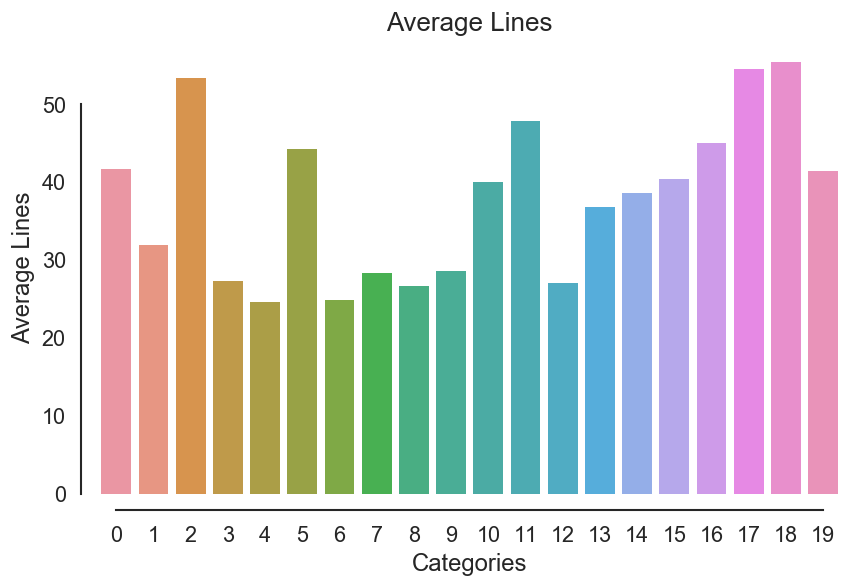

In [54]:
fig = plt.figure(figsize=(8, 5), dpi=120)
plt.title('Average Lines')
sns.barplot(x='Categories', y='Average Lines', data=mean_lines)
sns.despine(offset=10, trim=True)
plt.show()